### Outlier Detection and Removal Using IQR

You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here, https://www.kaggle.com/mustafaali96/weight-height
You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#load the dataset
df = pd.read_csv('height_weight.csv')
df.head(3)

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [5]:
df.shape

(10000, 3)

In [6]:
df.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


#### (1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

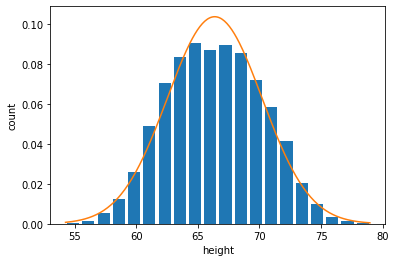

In [15]:
#plotting histogram for Height
from scipy.stats import norm
plt.hist(df.height, rwidth=.80, bins=20, density= True)
plt.xlabel('height')
plt.ylabel('count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

plt.show()

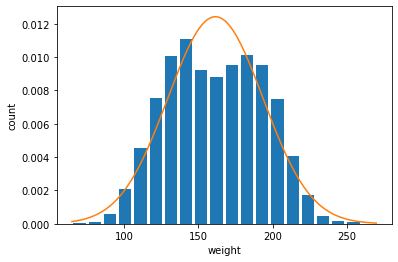

In [16]:
#plotting histogram for Weight
from scipy.stats import norm
plt.hist(df.weight, rwidth=.80, bins=20, density= True)
plt.xlabel('weight')
plt.ylabel('count')

rng = np.arange(df.weight.min(), df.weight.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.weight.mean(),df.weight.std()))

plt.show()

#### (2) Using IQR detect weight outliers and print them

Need derive below equations

IQR = Q3-Q1

lower_limit = Q1-1.5*IQR

upper_limit = Q2+1.5*IQR


In [17]:
Q1 = df.weight.quantile(.25)
Q3 = df.weight.quantile(.75)
Q1, Q3

(135.8180513055015, 187.16952486868348)

In [19]:
IQR = Q3 - Q1
IQR

51.35147356318197

In [20]:
Q2 = df.weight.quantile(.50)
Q2

161.212927699483

In [21]:
lower_limit  = Q1 -(1.5*IQR)
lower_limit

58.79084096072856

In [22]:
uppper_limit = Q2 +(1.5*IQR)
uppper_limit

238.24013804425596

In [28]:
outliers_weight = df[(df.weight<lower_limit) | (df.weight>uppper_limit)]
outliers_weight

,gender,height,weight
0,Male,73.847017,241.893563
290,Male,74.785714,239.464343
900,Male,74.216431,238.569451
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1568,Male,76.456578,239.581389
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
1954,Male,76.116675,240.638103


In [29]:
outliers_weight.shape

(31, 3)

#### (3) Using IQR, detect height outliers and print them

In [30]:
Q1 = df.height.quantile(.25)
Q3 = df.height.quantile(.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [31]:
IQR = Q3-Q1
IQR

5.668641245615746

In [32]:
Q2 = df.height.quantile(.50)
Q2

66.31807008178465

In [33]:
lower_limit = Q1 - (1.5*IQR)
lower_limit

55.00265861279534

In [34]:
upper_limit = Q3 + (1.5*IQR)
upper_limit

77.67722359525831

In [35]:
outliers_height = df[(df.height<lower_limit)|(df.height>upper_limit)]
outliers_height

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127
